# `Mounting Dataset From Drive.` 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# `1.Import Libraries.`

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# `2.Load Data into Train and Test Variables.`

In [ ]:
# My data is in google drive.
train_dir ="drive/My Drive/train_set/"
test_dir="drive/My Drive/test_data/"

# `3.Function To count Images In Each Data Set.`

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

12 Classes
14955 Train images
432 Test images


In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# The name of the 12 diseases.
train_generator.class_indices

{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Tomato___Bacterial_spot': 3,
 'Tomato___Early_blight': 4,
 'Tomato___Late_blight': 5,
 'Tomato___Leaf_Mold': 6,
 'Tomato___Septoria_leaf_spot': 7,
 'Tomato___Spider_mites Two-spotted_spider_mite': 8,
 'Tomato___Target_Spot': 9,
 'Tomato___Tomato_mosaic_virus': 10,
 'Tomato___healthy': 11}

# `4.CNN Parameter Building.`

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         


In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten_1', 'dense_1', 'dropout_1', 'dense_2', 'dense_3']


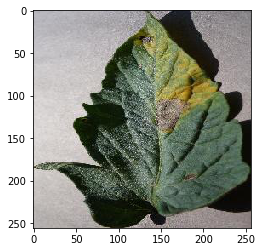

In [ ]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/Train_d/Tomato___Early_blight/Tomato___Early_blight (10).JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/My Drive/Train_d/Tomato___Early_blight/Tomato___Early_blight (10).JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 14955 images belonging to 12 classes.


In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          nb_epoch=15,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          nb_val_samples= validation_generator.samples// batch_size,verbose=1)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
467/467 [==============================] - 5582s 12s/step - loss: 1.4257 - acc: 0.5158 - val_loss: 0.8807 - val_acc: 0.6985
Epoch 2/15
467/467 [==============================] - 512s 1s/step - loss: 0.7404 - acc: 0.7432 - val_loss: 0.4629 - val_acc: 0.8372
Epoch 3/15
467/467 [==============================] - 514s 1s/step - loss: 0.5478 - acc: 0.8100 - val_loss: 0.3449 - val_acc: 0.8817
Epoch 4/15
467/467 [==============================] - 503s 1s/step - loss: 0.4554 - acc: 0.8455 - val_loss: 0.3712 - val_acc: 0.8705
Epoch 5/15
467/467 [==============================] - 505s 1s/step - loss: 0.3810 - acc: 0.8706 - val_loss: 0.2856 - val_acc: 0.9041
Epoch 6/15
467/467 [==============================] - 519s 1s/step - loss: 0.3417 - acc: 0.8787 - val_loss: 0.1948 - val_acc: 0.9357
Epoch 7/15
467/467 [==============================] - 518s 1s/step - loss: 0.2873 - acc: 0.9028 - val_

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

14/14 [==============================] - 95s 7s/step
Test score is 0.0937042572983989
Test accuracy is 0.9652777777777778


In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('plant_disease.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('plant_weights.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes


{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Tomato___Bacterial_spot': 3,
 'Tomato___Early_blight': 4,
 'Tomato___Late_blight': 5,
 'Tomato___Leaf_Mold': 6,
 'Tomato___Septoria_leaf_spot': 7,
 'Tomato___Spider_mites Two-spotted_spider_mite': 8,
 'Tomato___Target_Spot': 9,
 'Tomato___Tomato_mosaic_virus': 10,
 'Tomato___healthy': 11}

# `10.Load Model.`

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('plant_disease.h5')

Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy"]


Tomato___Bacterial_spot


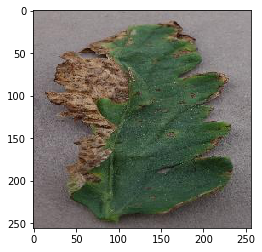

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


img_width=256
img_height=256


from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/My Drive/Test_d/Tomato_BacterialSpot/Tomato___Bacterial_spot (901).JPG')])
disease=image.load_img('/content/drive/My Drive/Test_d/Tomato_BacterialSpot/Tomato___Bacterial_spot (901).JPG')
plt.imshow(disease)
print (Classes[int(result)])